1.Importing Libraries

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **Importing** DataSet extracted from Worldometer website with latest data as of 21 March 2021


(https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?)


In [114]:
df=pd.read_excel('Worldometer Covid19 dataset.xlsx')      #Creating Dataframe as 'df' to store xlsx file
df.head(10)                                                 #df.head() it will show first 10 rows and all columns in data set

,Serial Number,Country,Total_Cases,New_Cases,Total_Deaths,New Deaths_in_last_24_hours,Total_Recovered,Active_Cases,Critical_patient,Total_Cases_per_1M_population,Deaths_per_1M_population,Test_per_1M_population,Test_per_1M_population.1,Population
0,0.0,World,123851274,426130.0,2727516.0,6021.0,99787335.0,21336423.0,90189.0,15889.0,349.9,NaN,NaN,NaN
1,1.0,USA,30521774,39505.0,555314.0,455.0,22754252.0,7212208.0,8640.0,91823.0,1671.0,389786114.0,1172643.0,3.323997e+08
2,2.0,Brazil,11998233,47774.0,294115.0,1259.0,10449933.0,1254185.0,8318.0,56159.0,1377.0,28600000.0,133866.0,2.136464e+08
3,3.0,India,11645719,47009.0,160003.0,213.0,11149324.0,336392.0,8944.0,8380.0,115.0,233565119.0,168062.0,1.389753e+09
4,4.0,Russia,4456869,9299.0,95030.0,371.0,4069395.0,292444.0,2300.0,30531.0,651.0,117400000.0,804222.0,1.459796e+08
5,5.0,UK,4296583,5312.0,126155.0,33.0,3673211.0,497217.0,830.0,63053.0,1851.0,112493147.0,1650845.0,6.814275e+07
6,6.0,France,4282603,30581.0,92305.0,138.0,279646.0,3910652.0,4287.0,65506.0,1412.0,58498845.0,894784.0,6.537763e+07
7,7.0,Italy,3376376,20159.0,104942.0,300.0,2699762.0,571672.0,3448.0,55902.0,1738.0,46890903.0,776370.0,6.039764e+07
8,8.0,Spain,3212332,NaN,72910.0,NaN,2945446.0,193976.0,1997.0,68687.0,1559.0,41114319.0,879115.0,4.676784e+07
9,9.0,Turkey,3013122,20428.0,30061.0,102.0,2825187.0,157874.0,1568.0,35452.0,354.0,36355374.0,427756.0,8.499088e+07


In [ ]:
df.shape       #In this dataset we have 223 rows and 14 columns

(223, 14)

In [ ]:
df.info()     #All datatypes are floats except Country name column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Serial Number                  222 non-null    float64
 1   Country                        223 non-null    object 
 2   Total_Cases                    223 non-null    int64  
 3   New_Cases                      156 non-null    float64
 4   Total_Deaths                   207 non-null    float64
 5   New Deaths_in_last_24_hours    116 non-null    float64
 6   Total_Recovered                221 non-null    float64
 7   Active_Cases                   221 non-null    float64
 8   Critical_patient               146 non-null    float64
 9   Total_Cases_per_1M_population  221 non-null    float64
 10  Deaths_per_1M_population       205 non-null    float64
 11  Test_per_1M_population         203 non-null    float64
 12  Test_per_1M_population.1       203 non-null    flo

In [ ]:
df.columns        #Unique columns present in dataset

Index(['Serial Number', 'Country', 'Total_Cases', 'New_Cases', 'Total_Deaths',
       'New Deaths_in_last_24_hours', 'Total_Recovered', 'Active_Cases',
       'Critical_patient', 'Total_Cases_per_1M_population',
       'Deaths_per_1M_population', 'Test_per_1M_population',
       'Test_per_1M_population.1', 'Population'],
      dtype='object')

In [ ]:
df.isna().sum()  #We are checking for NAN of null values present in the dataset,We oberveed mutilple columns having Null values

Serial Number                      1
Country                            0
Total_Cases                        0
New_Cases                         67
Total_Deaths                      16
New Deaths_in_last_24_hours      107
Total_Recovered                    2
Active_Cases                       2
Critical_patient                  77
Total_Cases_per_1M_population      2
Deaths_per_1M_population          18
Test_per_1M_population            20
Test_per_1M_population.1          20
Population                         4
dtype: int64

In [ ]:
df.isna().mean()        # Checking the weightage of each column in missing value,all columns have less than 1%percentage of weightage,so we can drop NAN columns in the dataset as it will not affect our analysis.

Serial Number                    0.004484
Country                          0.000000
Total_Cases                      0.000000
New_Cases                        0.300448
Total_Deaths                     0.071749
New Deaths_in_last_24_hours      0.479821
Total_Recovered                  0.008969
Active_Cases                     0.008969
Critical_patient                 0.345291
Total_Cases_per_1M_population    0.008969
Deaths_per_1M_population         0.080717
Test_per_1M_population           0.089686
Test_per_1M_population.1         0.089686
Population                       0.017937
dtype: float64

In [ ]:
df.tail(10)        #Observing more missing values in last rows

,Serial Number,Country,Total_Cases,New_Cases,Total_Deaths,New Deaths_in_last_24_hours,Total_Recovered,Active_Cases,Critical_patient,Total_Cases_per_1M_population,Deaths_per_1M_population,Test_per_1M_population,Test_per_1M_population.1,Population
213,213.0,Anguilla,22,NaN,NaN,NaN,20.0,2.0,NaN,1457.0,NaN,11052.0,731969.0,15099.0
214,214.0,Montserrat,20,NaN,1.0,NaN,19.0,0.0,NaN,4005.0,200.0,1093.0,218863.0,4994.0
215,215.0,Solomon Islands,18,NaN,NaN,NaN,16.0,2.0,NaN,26.0,NaN,4500.0,6439.0,698903.0
216,216.0,Western Sahara,10,NaN,1.0,NaN,8.0,1.0,NaN,16.0,2.0,NaN,NaN,607818.0
217,217.0,MS Zaandam,9,NaN,2.0,NaN,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
218,218.0,Marshall Islands,4,NaN,NaN,NaN,4.0,0.0,NaN,67.0,NaN,NaN,NaN,59477.0
219,219.0,Samoa,3,NaN,NaN,NaN,2.0,1.0,NaN,15.0,NaN,NaN,NaN,199363.0
220,220.0,Vanuatu,3,NaN,NaN,NaN,1.0,2.0,NaN,10.0,NaN,470.0,1505.0,312269.0
221,221.0,Micronesia,1,NaN,NaN,NaN,1.0,0.0,NaN,9.0,NaN,NaN,NaN,115889.0
222,NaN,Total:,123851274,426130.0,2727516.0,6021.0,99787335.0,21336423.0,90189.0,15889.0,349.9,NaN,NaN,NaN


#Preprocessing Dataset by average the missing value by fillna,backfill or mean method.We will drop rows with null values which are less significant.

In [ ]:
df = df.dropna()      #Dropping rows in Data set with NAN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,Serial Number,Country,Total_Cases,New_Cases,Total_Deaths,New Deaths_in_last_24_hours,Total_Recovered,Active_Cases,Critical_patient,Total_Cases_per_1M_population,Deaths_per_1M_population,Test_per_1M_population,Test_per_1M_population.1,Population
0,1,1.0,USA,30521774,39505.0,555314.0,455.0,22754252.0,7212208.0,8640.0,91823.0,1671.0,389786114.0,1172643.0,3.323997e+08
1,2,2.0,Brazil,11998233,47774.0,294115.0,1259.0,10449933.0,1254185.0,8318.0,56159.0,1377.0,28600000.0,133866.0,2.136464e+08
2,3,3.0,India,11645719,47009.0,160003.0,213.0,11149324.0,336392.0,8944.0,8380.0,115.0,233565119.0,168062.0,1.389753e+09
3,4,4.0,Russia,4456869,9299.0,95030.0,371.0,4069395.0,292444.0,2300.0,30531.0,651.0,117400000.0,804222.0,1.459796e+08
4,5,5.0,UK,4296583,5312.0,126155.0,33.0,3673211.0,497217.0,830.0,63053.0,1851.0,112493147.0,1650845.0,6.814275e+07


In [ ]:
df.isna().sum()   #No NAN Values post preprocessing

index                            0
Serial Number                    0
Country                          0
Total_Cases                      0
New_Cases                        0
Total_Deaths                     0
New Deaths_in_last_24_hours      0
Total_Recovered                  0
Active_Cases                     0
Critical_patient                 0
Total_Cases_per_1M_population    0
Deaths_per_1M_population         0
Test_per_1M_population           0
Test_per_1M_population.1         0
Population                       0
dtype: int64

In [ ]:
df.describe()   #We can get min,max, mean,interquatile range of each column from desribe function

,index,Serial Number,Total_Cases,New_Cases,Total_Deaths,New Deaths_in_last_24_hours,Total_Recovered,Active_Cases,Critical_patient,Total_Cases_per_1M_population,Deaths_per_1M_population,Test_per_1M_population,Test_per_1M_population.1,Population
count,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,9.100000e+01,9.100000e+01,91.000000,91.000000,91.000000,9.100000e+01,9.100000e+01,9.100000e+01
mean,61.417582,61.417582,1.228817e+06,4407.120879,27523.131868,63.109890,9.962516e+05,2.050427e+05,946.835165,36499.747253,689.439560,1.558676e+07,4.665339e+05,4.965234e+07
std,41.972495,41.972495,3.650731e+06,9153.422609,71983.960092,159.721942,2.874860e+06,8.626396e+05,1773.276592,30986.609097,625.926038,4.993215e+07,6.600048e+05,1.518241e+08
min,1.000000,1.000000,2.294000e+03,3.000000,16.000000,1.000000,1.534000e+03,1.510000e+02,2.000000,113.000000,8.000000,1.754400e+04,5.790000e+02,3.909300e+04
25%,26.500000,26.500000,8.853550e+04,323.500000,1212.500000,3.000000,6.845950e+04,6.011500e+03,68.000000,9963.500000,116.000000,9.087100e+05,8.764850e+04,5.081739e+06
50%,58.000000,58.000000,2.305990e+05,817.000000,4587.000000,14.000000,1.989200e+05,2.430000e+04,179.000000,31794.000000,518.000000,2.279472e+06,2.616060e+05,1.190745e+07
75%,89.500000,89.500000,8.226510e+05,4249.500000,17515.000000,41.500000,6.484625e+05,7.660550e+04,757.000000,56506.500000,1159.000000,9.036370e+06,5.580300e+05,4.021085e+07
max,178.000000,178.000000,3.052177e+07,47774.000000,555314.000000,1259.000000,2.275425e+07,7.212208e+06,8944.000000,138845.000000,2305.000000,3.897861e+08,3.854693e+06,1.389753e+09


In [ ]:
# We are observing Coutires with max number of covid cases are present of top 10 positions we will will get right skewed graph mostly on histogram

# ***Exploratory Data Analysis (EDA)***

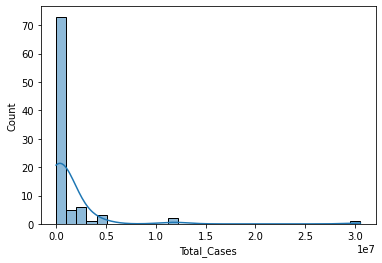

In [ ]:
sns.histplot(df['Total_Cases'],bins=30,kde=True)    #Right Skewed graph, first 10 countries most of the covid cases

In [ ]:
dataset=df.iloc[:10,2:]
dataset  #Selecting top 10 countries

,Country,Total_Cases,New_Cases,Total_Deaths,New Deaths_in_last_24_hours,Total_Recovered,Active_Cases,Critical_patient,Total_Cases_per_1M_population,Deaths_per_1M_population,Test_per_1M_population,Test_per_1M_population.1,Population
0,USA,30521774,39505.0,555314.0,455.0,22754252.0,7212208.0,8640.0,91823.0,1671.0,389786114.0,1172643.0,3.323997e+08
1,Brazil,11998233,47774.0,294115.0,1259.0,10449933.0,1254185.0,8318.0,56159.0,1377.0,28600000.0,133866.0,2.136464e+08
2,India,11645719,47009.0,160003.0,213.0,11149324.0,336392.0,8944.0,8380.0,115.0,233565119.0,168062.0,1.389753e+09
3,Russia,4456869,9299.0,95030.0,371.0,4069395.0,292444.0,2300.0,30531.0,651.0,117400000.0,804222.0,1.459796e+08
4,UK,4296583,5312.0,126155.0,33.0,3673211.0,497217.0,830.0,63053.0,1851.0,112493147.0,1650845.0,6.814275e+07
5,France,4282603,30581.0,92305.0,138.0,279646.0,3910652.0,4287.0,65506.0,1412.0,58498845.0,894784.0,6.537763e+07
6,Italy,3376376,20159.0,104942.0,300.0,2699762.0,571672.0,3448.0,55902.0,1738.0,46890903.0,776370.0,6.039764e+07
7,Turkey,3013122,20428.0,30061.0,102.0,2825187.0,157874.0,1568.0,35452.0,354.0,36355374.0,427756.0,8.499088e+07
8,Germany,2670000,11149.0,75270.0,74.0,2415200.0,179530.0,2848.0,31794.0,896.0,47578793.0,566569.0,8.397698e+07
9,Colombia,2337150,5963.0,62028.0,121.0,2230195.0,44927.0,1982.0,45583.0,1210.0,12286609.0,239634.0,5.127244e+07


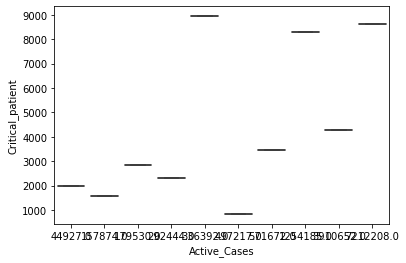

In [ ]:
sns.boxplot(data=dataset,x='Active_Cases',y='Critical_patient')  #Ratio of active cases with respect to Crticail Patient cases is significantly high in 5 th country

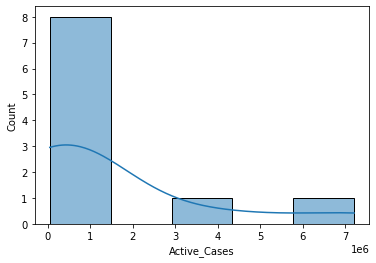

In [ ]:
sns.histplot(dataset['Active_Cases'],bins=5,kde=True)    #Active cases in US is significatly high than other 9 countries

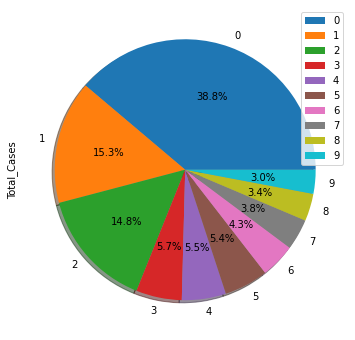

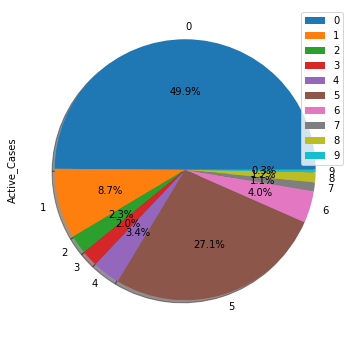

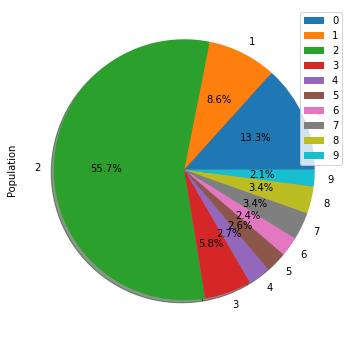

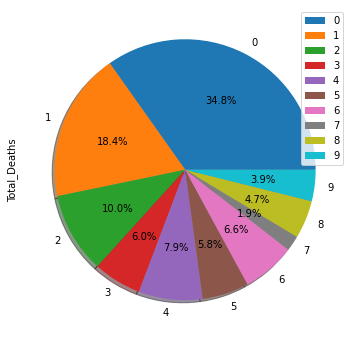

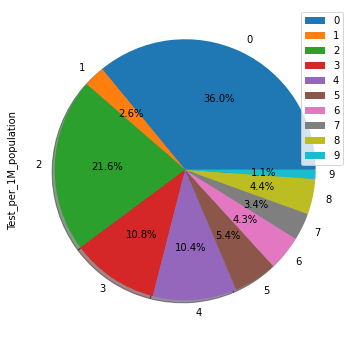

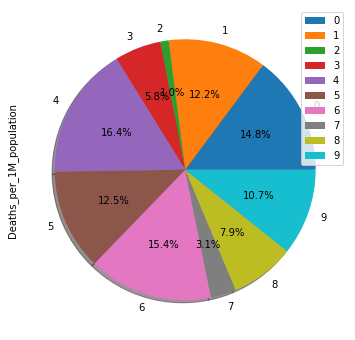

In [ ]:
dataset.plot.pie(y='Total_Cases',autopct="%.1f%%",figsize=(6, 6),shadow=True) #Pie plot repesentation of top 10 countries and % of Total cases.USA has 38% of covid cases

dataset.plot.pie(y='Active_Cases',autopct="%.1f%%",figsize=(6, 6),shadow=True) #USA has 50% share in Active among 9 other countries

dataset.plot.pie(y='Population',autopct="%.1f%%",figsize=(6, 6),shadow=True) #India is having Highest Population among all countries

dataset.plot.pie(y='Total_Deaths',autopct="%.1f%%",figsize=(6, 6),shadow=True)  #35% deaths occured in US due to Covid 19

dataset.plot.pie(y='Test_per_1M_population',autopct="%.1f%%",figsize=(6, 6),shadow=True)

dataset.plot.pie(y='Deaths_per_1M_population',autopct="%.1f%%",figsize=(6, 6),shadow=True)#India is having lowest Deaths per Million in top 10 Covid countries.





In [120]:
df1=df.iloc[:,:]    #Removed index column and stored new dataframe in df1
df1.head()

,Serial Number,Country,Total_Cases,New_Cases,Total_Deaths,New Deaths_in_last_24_hours,Total_Recovered,Active_Cases,Critical_patient,Total_Cases_per_1M_population,Deaths_per_1M_population,Test_per_1M_population,Test_per_1M_population.1,Population
0,0.0,World,123851274,426130.0,2727516.0,6021.0,99787335.0,21336423.0,90189.0,15889.0,349.9,NaN,NaN,NaN
1,1.0,USA,30521774,39505.0,555314.0,455.0,22754252.0,7212208.0,8640.0,91823.0,1671.0,389786114.0,1172643.0,3.323997e+08
2,2.0,Brazil,11998233,47774.0,294115.0,1259.0,10449933.0,1254185.0,8318.0,56159.0,1377.0,28600000.0,133866.0,2.136464e+08
3,3.0,India,11645719,47009.0,160003.0,213.0,11149324.0,336392.0,8944.0,8380.0,115.0,233565119.0,168062.0,1.389753e+09
4,4.0,Russia,4456869,9299.0,95030.0,371.0,4069395.0,292444.0,2300.0,30531.0,651.0,117400000.0,804222.0,1.459796e+08


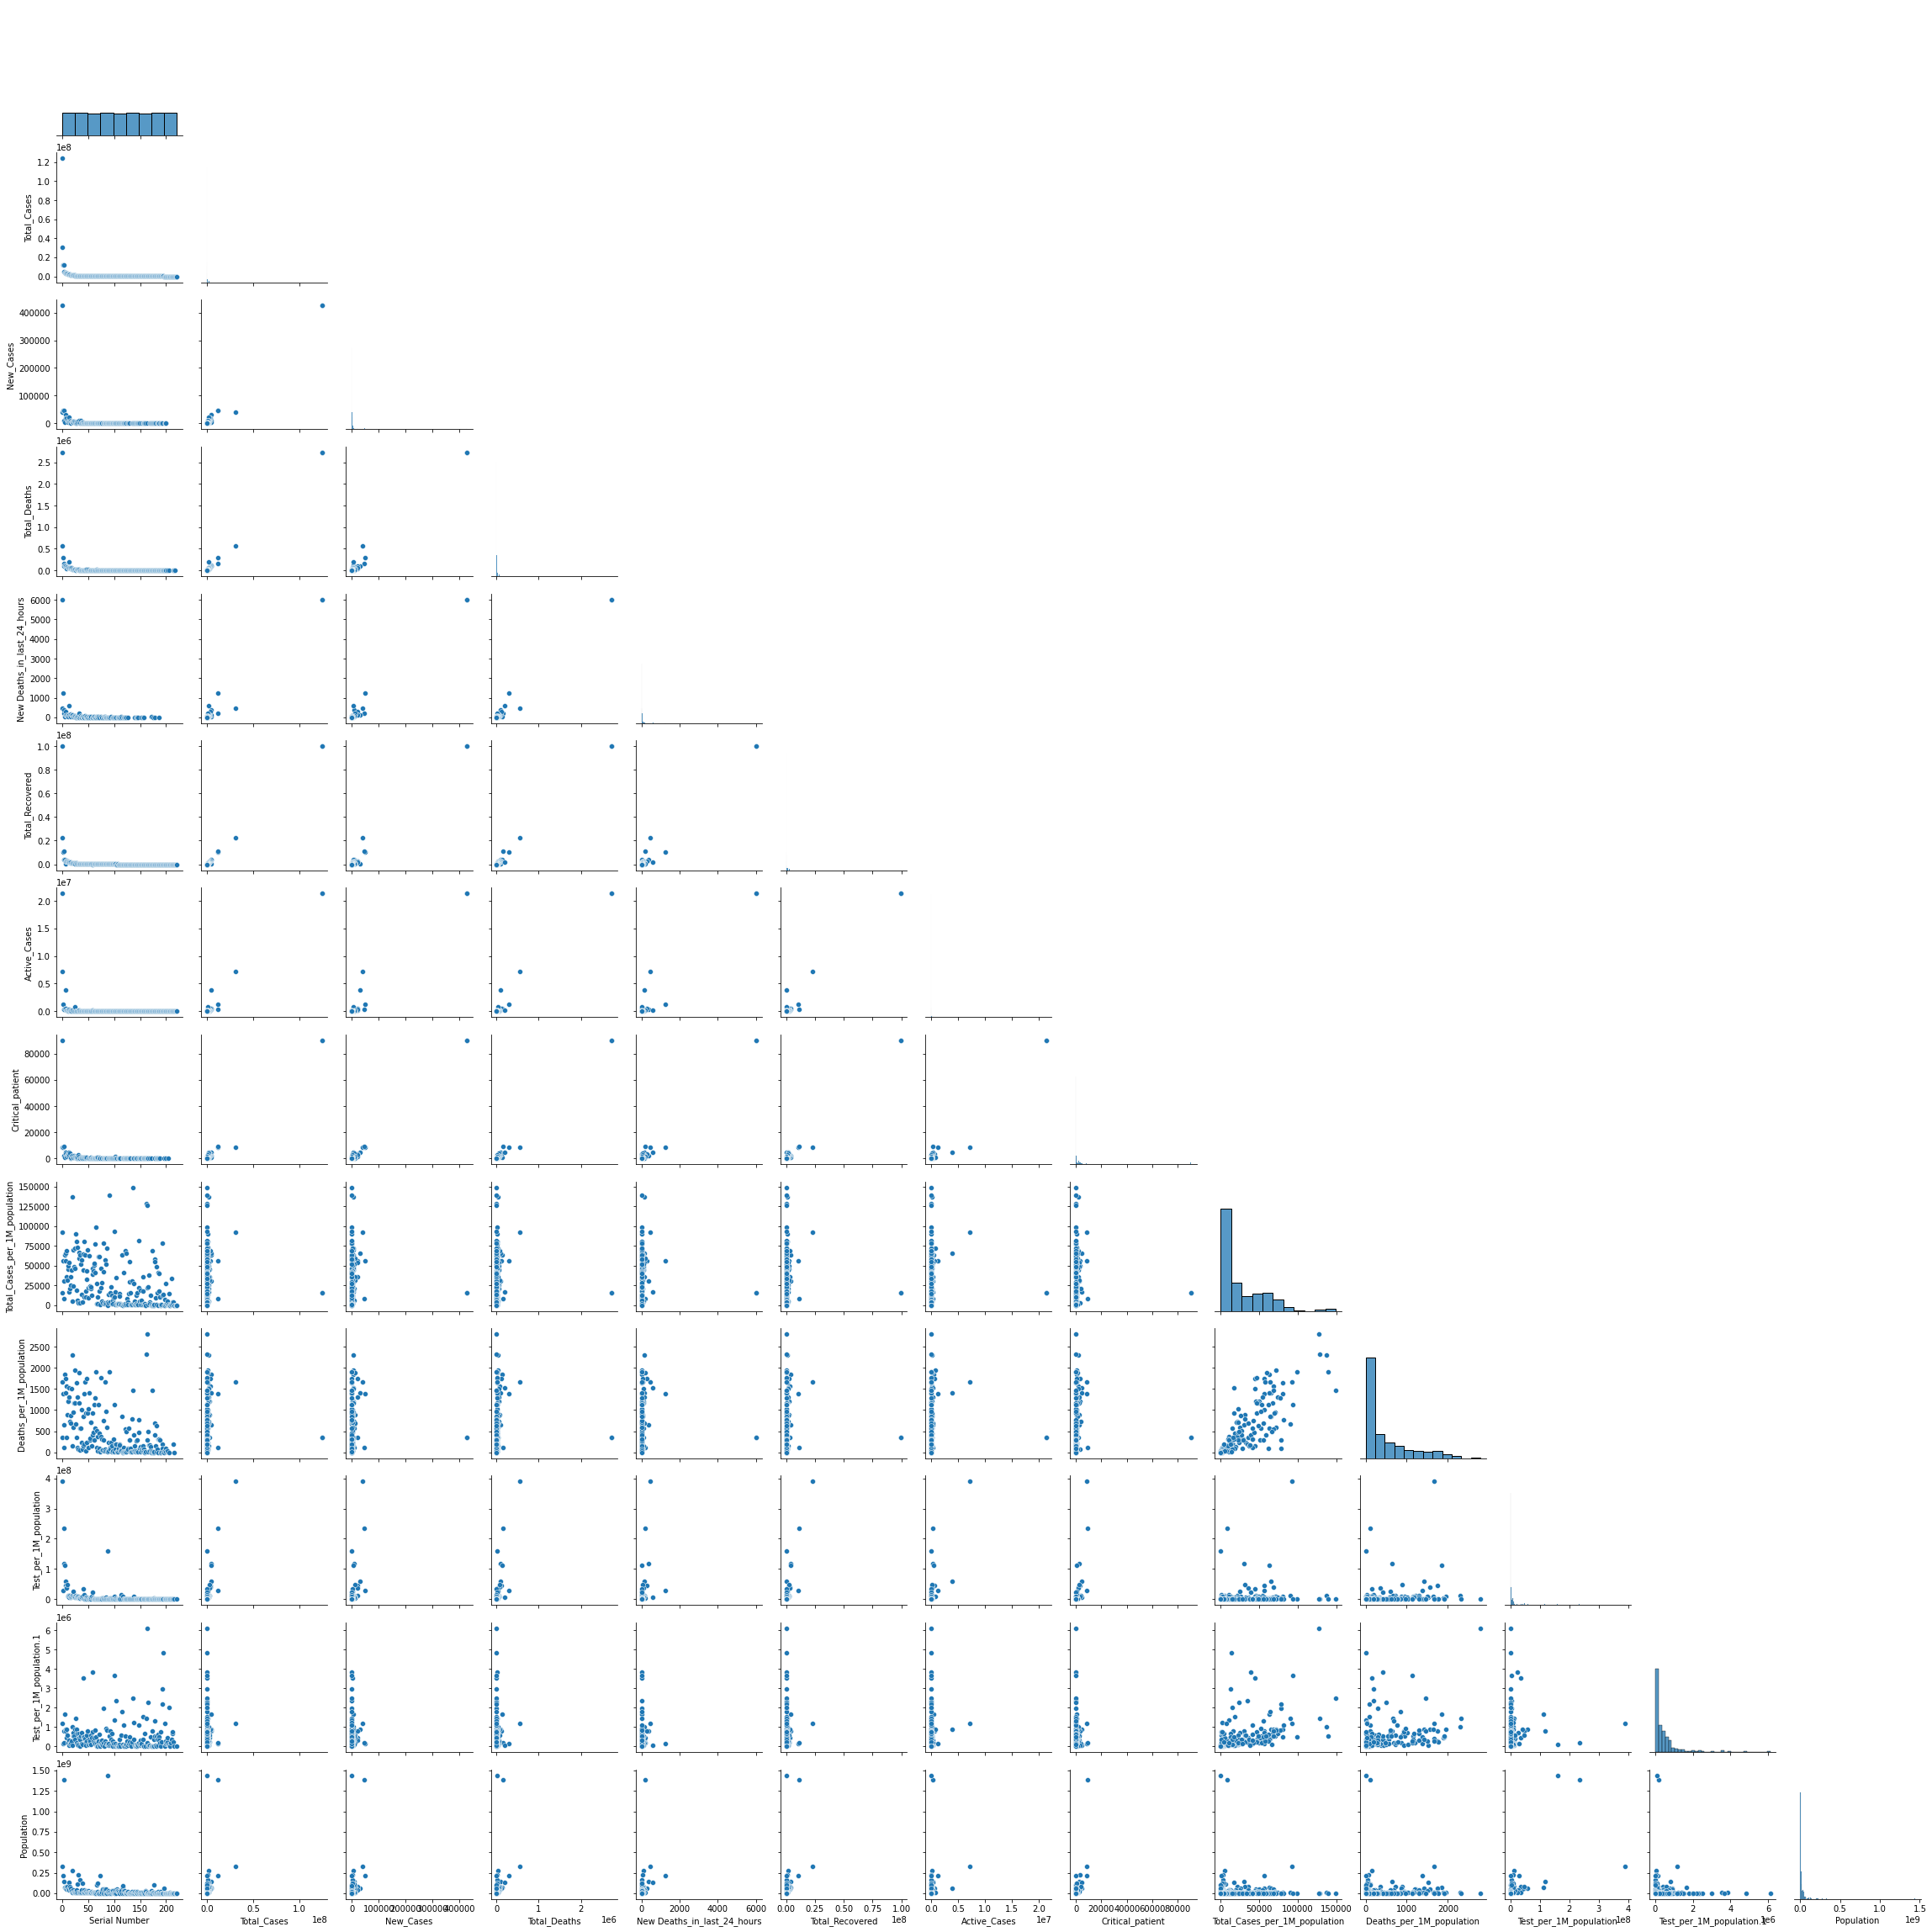

In [121]:
sns.pairplot(data=df1,corner=True)   # Finding relationship between all columns in data set at once.

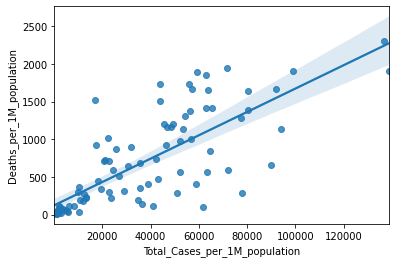

In [ ]:
sns.regplot(data=df1,x='Total_Cases_per_1M_population',y='Deaths_per_1M_population')  #Found linear relationship between X and Y axis from above pairplot with outliers.

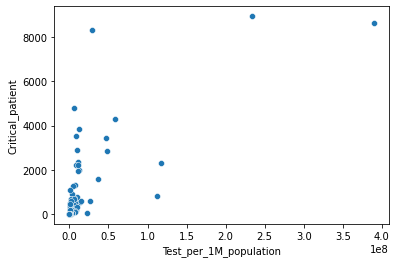

In [ ]:
sns.scatterplot(data=df1,x='Test_per_1M_population',y='Critical_patient')

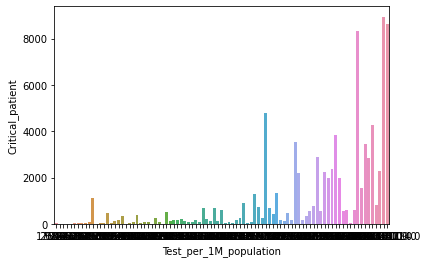

In [ ]:
sns.barplot(data=df1,x='Test_per_1M_population',y='Critical_patient')  #On extreme right side we have performed max test where we are getting highest Crtical patient in the country.
# X axis denotes countries with highest test_per_1M,we cannot plot 200+countries on X axis but can find relationship between highest test and crtical patient 

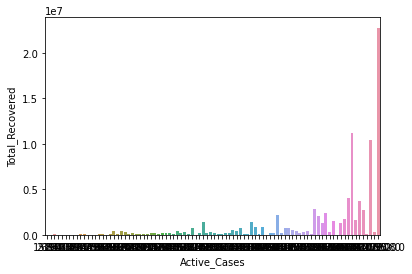

In [ ]:
sns.barplot(data=df1,x='Active_Cases',y='Total_Recovered')  

# New Excel File of covid showing relationship between Number of days ,how covid cases are rising exponentially.We can predict the rising covid cases bases on Polynomial alogrithm 

In [123]:
df2=pd.read_excel('covid_data.xlsx')
df2.head()

,Serial Number,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,1,1,1,0,0,0,0
1,2,0,1,0,0,0,0
2,3,0,1,0,0,0,0
3,4,1,2,0,0,0,0
4,5,1,3,0,0,0,0


In [124]:
df2.shape

(190, 7)

In [125]:
new_columns={'Serial Number':'Days'}
df2.rename(columns = new_columns, inplace=True)

df2.head()

,Days,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,1,1,1,0,0,0,0
1,2,0,1,0,0,0,0
2,3,0,1,0,0,0,0
3,4,1,2,0,0,0,0
4,5,1,3,0,0,0,0


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Days             190 non-null    int64
 1   Daily Confirmed  190 non-null    int64
 2   Total Confirmed  190 non-null    int64
 3   Daily Recovered  190 non-null    int64
 4   Total Recovered  190 non-null    int64
 5   Daily Deceased   190 non-null    int64
 6   Total Deceased   190 non-null    int64
dtypes: int64(7)
memory usage: 10.5 KB


In [ ]:
df2.isna().sum()

Days               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

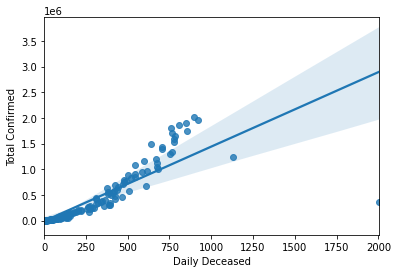

In [127]:
sns.regplot(data=df2,x='Daily Deceased',y="Total Confirmed")  #Observing Linear Reg plot is not suitable as Total cases of covid rising exponentially

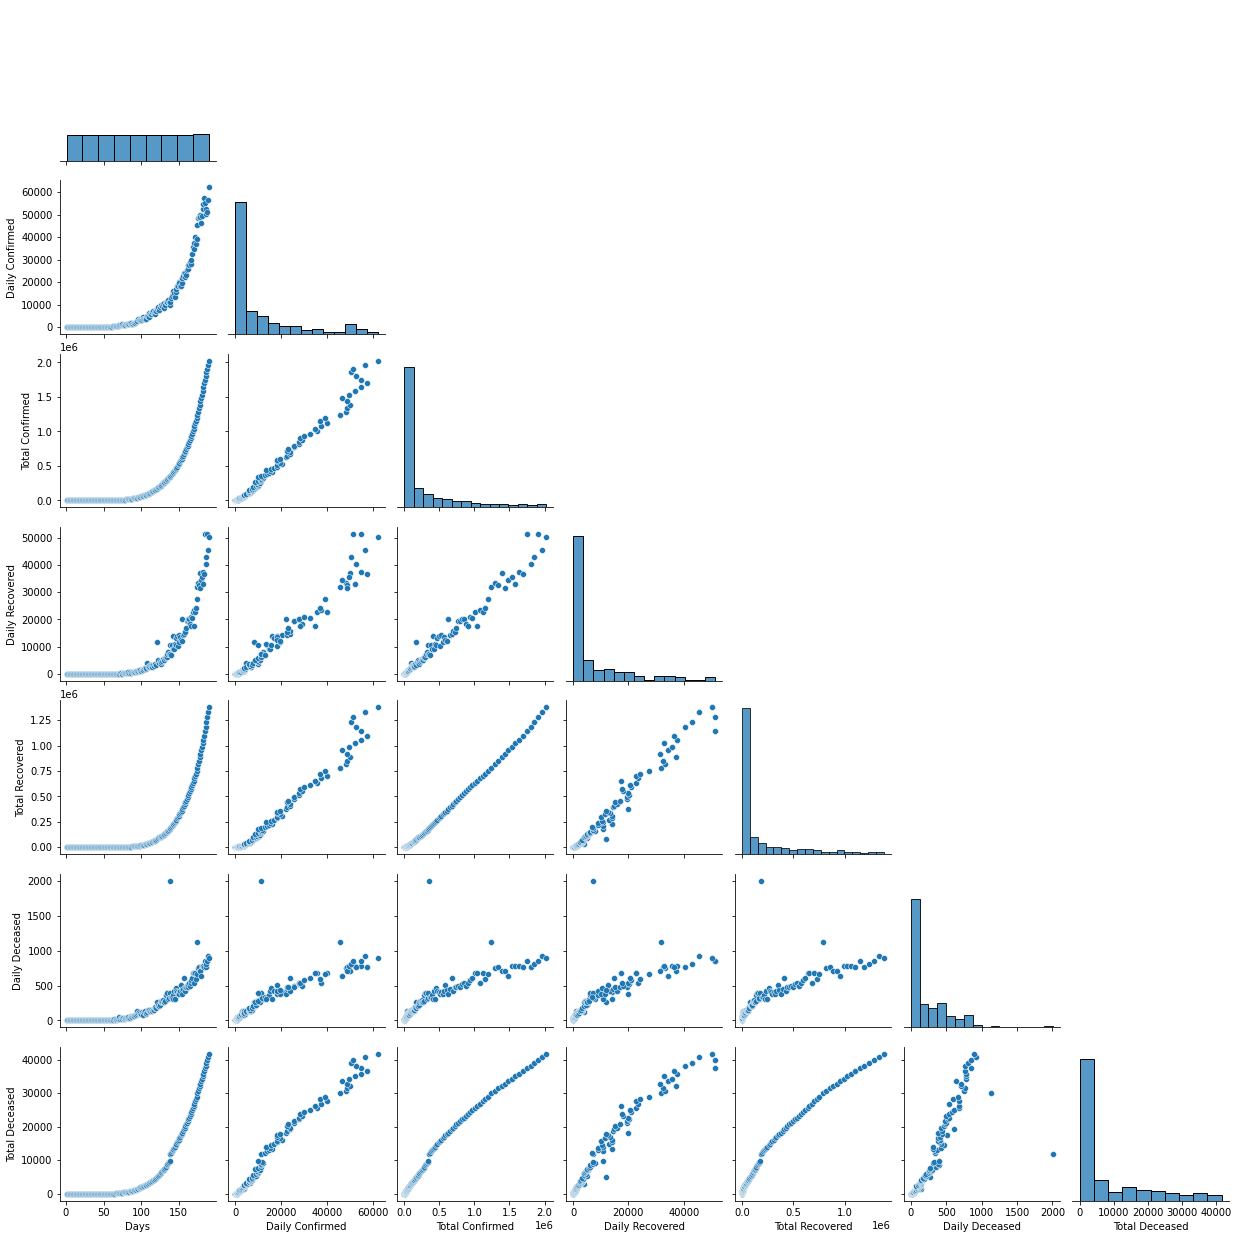

In [129]:
sns.pairplot(data=df2,corner=True)        #Finding Relationship between all columns in 2nd dataset

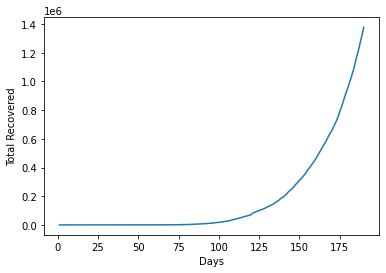

In [ ]:
sns.lineplot(data=df2, x="Days", y="Total Recovered")   #Recovery in terms of days in also exponentaial.

In [ ]:
df2.describe()

,Days,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,190.000000,190.000000,1.900000e+02,190.000000,1.900000e+02,190.000000,190.000000
mean,95.500000,10660.121053,3.088709e+05,7248.815789,1.869665e+05,219.226316,7849.294737
std,54.992424,15739.372014,4.939299e+05,11755.421065,3.223640e+05,291.382213,11371.176250
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,48.250000,22.750000,1.522500e+02,1.000000,1.500000e+01,0.250000,3.000000
50%,95.500000,2961.500000,4.460600e+04,1022.000000,1.230400e+04,91.500000,1514.500000
75%,142.750000,14512.250000,4.077742e+05,10594.750000,2.246905e+05,383.250000,13201.000000
max,190.000000,62170.000000,2.025423e+06,51368.000000,1.377275e+06,2004.000000,41653.000000


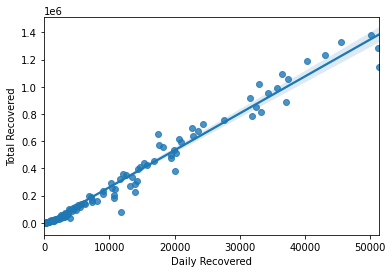

In [ ]:
sns.regplot(data=df2,x='Daily Recovered',y='Total Recovered')  #This plot is showing linear regression plot interm of Daily vs Total Recovered cases

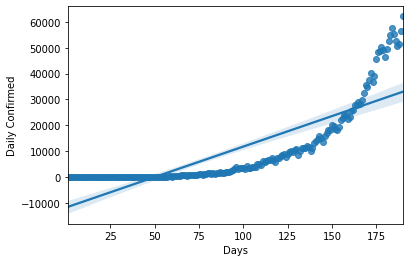

In [ ]:
sns.regplot(data=df2,x='Days',y='Daily Confirmed')  #Daily cases are rising exponentially as shown in fig,with respect to days.

In [ ]:
#Implement Polynomial Regression as Number of cases are increasing exponentially with respect to days 

X = df2.iloc[:,[0]].values    #Selecting number of days
y = df2.iloc[:,[2]].values     #Selecting Number of confirmed cases


Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualising the Linear Regression results

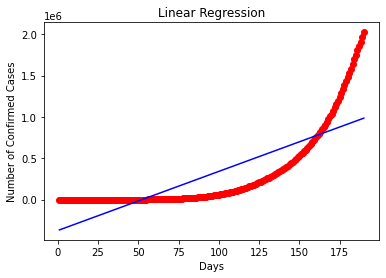

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title( ('Linear Regression'))
plt.xlabel('Days')
plt.ylabel('Number of Confirmed Cases')
plt.show()


Visualising the Polynomial Regression results

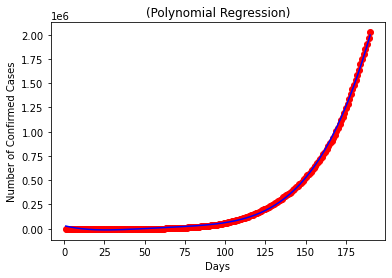

In [ ]:
#Polynomial Regression line overfits the actauls number of case, primary reason the number of observations on which the regression model is being trained.Higher the data set ,higher the accuracy.

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title( '(Polynomial Regression)')
plt.xlabel('Days')
plt.ylabel('Number of Confirmed Cases')
plt.show()

Predicting a new result with Linear Regression

In [ ]:
lin_reg.predict([[150]])  # As I have implemented Linear As well as Polynomial regression,Lets check how accurately linear reg and poly regression is going to show results.

#Linear Regression model failed to predict the correct cases on 150 th day in above Reg plot as Reg plot is linear in nature.

array([[699007.15202316]])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[150]]))     #Polynomial reg correctly measure the accuracy for 150th day with above grap showing accracy in for form of array which can be measured as 0.52 on above plot.

array([[526802.78030061]])

### 3 rd data set consist of 300 patient and their CT Severity score.The Cluster is being formed in order to find the relationship between the age and Severity score to get more insights about covid severity on different age Groups

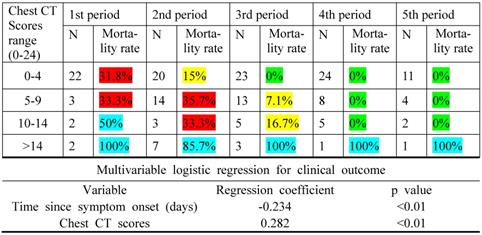

In [ ]:
df3=pd.read_excel('covid_symptoms_data.xlsx')   #New dataset is stored in df3
df3.head()

,Patient ID,Gender,Age,CT Severity Score
0,1,Male,19,18
1,2,Male,21,9
2,3,Female,20,2
3,4,Female,23,13
4,5,Female,31,8


In [ ]:
df3.shape    # We have 300 rows and 4 columns of observations,shwoing symptoms and different ae group in the dataset

(299, 4)

In [ ]:
df3.isna().sum()

Patient ID           0
Gender               0
Age                  0
CT Severity Score    0
dtype: int64

In [ ]:
X=df3.iloc[:,[2,3]].values     #Selecting Age and CT Severity Score
X

array([[19, 18],
       [21,  9],
       [20,  2],
       [23, 13],
       [31,  8],
       [22, 13],
       [35, 22],
       [23,  1],
       [64,  3],
       [30,  1],
       [67, 18],
       [35, 15],
       [58, 19],
       [24, 18],
       [37, 17],
       [22, 13],
       [35, 12],
       [20,  3],
       [52, 17],
       [35, 12],
       [35, 20],
       [25,  7],
       [46, 16],
       [31,  2],
       [54,  3],
       [29, 16],
       [45,  7],
       [35,  6],
       [40,  1],
       [23,  2],
       [60,  4],
       [21,  1],
       [53, 19],
       [18, 12],
       [49, 19],
       [21, 15],
       [42,  8],
       [30, 11],
       [36,  1],
       [20, 23],
       [65, 18],
       [24, 20],
       [48, 21],
       [31, 15],
       [49, 10],
       [24, 10],
       [50,  4],
       [27,  7],
       [29, 15],
       [31,  4],
       [49, 19],
       [33,  6],
       [31, 13],
       [59, 21],
       [50, 19],
       [47, 15],
       [51, 23],
       [69, 19],
       [27, 24

Making use if Clustering Model to classify Severe and Less Severe Groups using Hierachical CLustering

## Using the dendrogram to find the optimal number of clusters


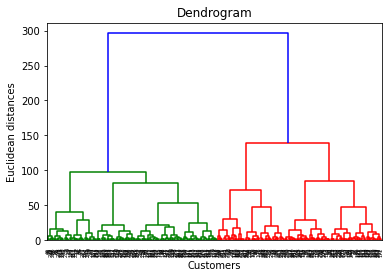

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')  #Keeping value of N-Cluster as 5
y_hc = hc.fit_predict(X)



```
# This is formatted as code
```

# Visualising the clusters of Hierarchichal Clustering

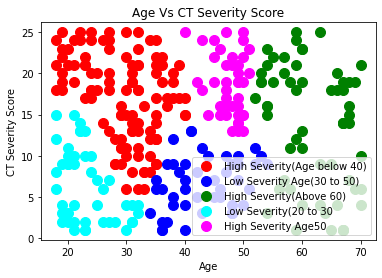

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'High Severity(Age below 40)')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Low Severity Age(30 to 50)')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Severity(Above 60)')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Low Severity(20 to 30')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'High Severity Age50')
plt.title('Age Vs CT Severity Score')
plt.xlabel('Age')
plt.ylabel('CT Severity Score')
plt.legend()
plt.show()

# Applying K Means Clustering Model

Finding Optimal number of Cluster using Elbow Method

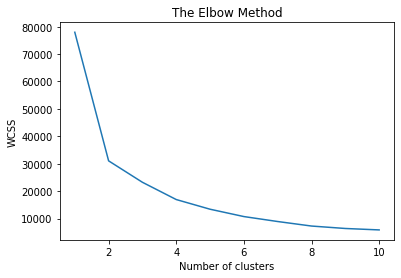

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

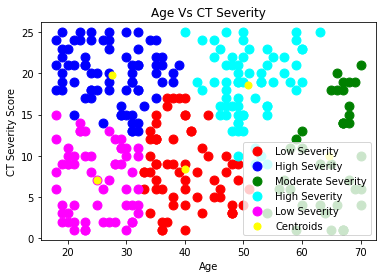

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Low Severity')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'High Severity')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Moderate Severity')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'High Severity')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 80, c = 'magenta', label = 'Low Severity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Age Vs CT Severity')
plt.xlabel('Age')
plt.ylabel('CT Severity Score')
plt.legend()
plt.show()

# In this dataset formation of wordcloud is performed using Natural Language Processing.Covid Info Text is taken from Wikipedia Page.

In [ ]:
!pip install wordcloud   #Importing and installing library
import nltk
import wordcloud

In [ ]:
Covid_info='''Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case was identified in Wuhan, China, in December 2019.[7] The disease has since spread worldwide, leading to an ongoing pandemic.[8]

Symptoms of COVID-19 are variable, but often include fever, cough, fatigue, breathing difficulties, and loss of smell and taste. Symptoms begin one to fourteen days after exposure to the virus. Of those people who develop noticeable symptoms, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).[9] Older people are more likely to have severe symptoms. At least a third of the people who are infected with the virus remain asymptomatic and do not develop noticeable symptoms at any point in time, but they still can spread the disease.[10][11] Around 20% of those people will remain asymptomatic throughout infection, and the rest will develop symptoms later on, becoming pre-symptomatic rather than asymptomatic and therefore having a higher risk of transmitting the virus to others.[12] Some people continue to experience a range of effects—known as long COVID—for months after recovery, and damage to organs has been observed.[13] Multi-year studies are underway to further investigate the long-term effects of the disease.[13]

The virus that causes COVID-19 spreads mainly when an infected person is in close contact[a] with another person.[17][18] Small droplets and aerosols containing the virus can spread from an infected person's nose and mouth as they breathe, cough, sneeze, sing, or speak. Other people are infected if the virus gets into their mouth, nose or eyes. The virus may also spread via contaminated surfaces, although this is not thought to be the main route of transmission.[18] The exact route of transmission is rarely proven conclusively,[19] but infection mainly happens when people are near each other for long enough. People who are infected can transmit the virus to another person up to two days before they themselves show symptoms, as can people who do not experience symptoms. People remain infectious for up to ten days after the onset of symptoms in moderate cases and up to 20 days in severe cases.[20] Several testing methods have been developed to diagnose the disease. The standard diagnostic method is by detection of the virus' nucleic acid by real-time reverse transcription polymerase chain reaction (rRT-PCR), transcription-mediated amplification (TMA), or by reverse transcription loop-mediated isothermal amplification (RT-LAMP) from a nasopharyngeal swab.

Preventive measures include physical or social distancing, quarantining, ventilation of indoor spaces, covering coughs and sneezes, hand washing, and keeping unwashed hands away from the face. The use of face masks or coverings has been recommended in public settings to minimise the risk of transmissions. Several vaccines have been developed and several countries have initiated mass vaccination campaigns.

Although work is underway to develop drugs that inhibit the virus, the primary treatment is currently symptomatic. Management involves the treatment of symptoms, supportive care, isolation, and experimental measures.'''

In [ ]:
Covid_info

"Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case was identified in Wuhan, China, in December 2019.[7] The disease has since spread worldwide, leading to an ongoing pandemic.[8]\n\nSymptoms of COVID-19 are variable, but often include fever, cough, fatigue, breathing difficulties, and loss of smell and taste. Symptoms begin one to fourteen days after exposure to the virus. Of those people who develop noticeable symptoms, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).[9] Older people are more likely to have severe symptoms. At least a third of the people who are infected with the virus remain asymptomatic and do not develop noticeable symptoms at any point in time, but they still can 

In [ ]:

nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
def wordc1(abc):
    plt.figure(figsize=(10,10))
    plt.imshow(abc)
    plt.axis('off')

from wordcloud import WordCloud
wordcloud=WordCloud(width=500,height=500).generate(Covid_info)

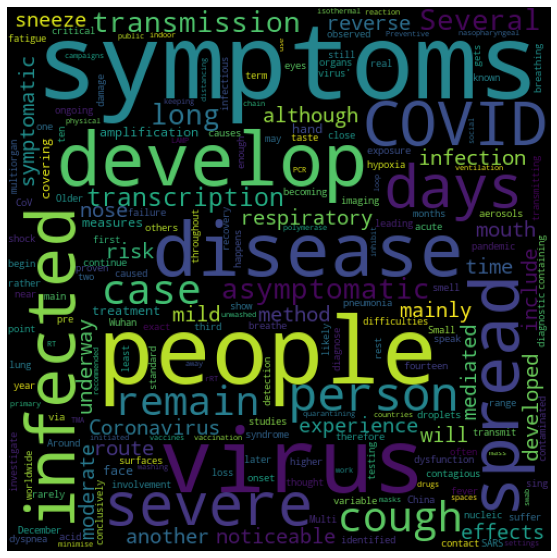

In [ ]:
wordc1(wordcloud)    # wordcloud selects the word whcih is more frequenct in the "Covid_info" data.